In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def plot(intel, amd, app):
    # Data
    intel_times = intel  # Intel CPU, with and without RAPL
    amd_times = amd       # AMD CPU, with and without E-SMI
    # Normalize the times (assuming the first value is the baseline for each CPU)
    intel_normalized = [time / intel_times[0] for time in intel_times]
    amd_normalized = [time / amd_times[0] for time in amd_times]
    
    # Bar labels and positions
    labels = ['Intel(R) Xeon(R) Platinum 8380', 'AMD EPYC 7763']
    x = np.arange(len(labels))
    width = 0.2  # Width of the bars
    
    # Plotting
    fig, ax = plt.subplots()
    
    # Bars for Intel and AMD with specific labels
    rects1 = ax.bar(x - width/2, [intel_normalized[0], amd_normalized[0]], width)
    rects2 = ax.bar(x + width/2, [intel_normalized[1], amd_normalized[1]], width)
    
    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_ylabel('Normalized Runtime')
    ax.set_title(app,pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    
    # Custom labels for the second bar in each group
    # ax.legend(['Baseline', 'With RAPL', 'With E-SMI'], loc='upper left')
    # description = (
    #     "This chart compares the normalized runtime overhead of running the NPB applications "
    #     "on Intel and AMD CPUs. The 'Without RAPL/E-SMI' bars represent the baseline "
    #     "execution times without power management tools. The 'With RAPL/E-SMI' bars show "
    #     "the execution times with Intel's RAPL or AMD's E-SMI tools enabled (reading energy data every 0.1 second), normalized "
    #     "against the baseline times. A higher bar indicates a greater overhead."
    # )
    # fig.text(0.5, -0.3, description, wrap=True, horizontalalignment='center', fontsize=14)
    # Function to add labels on top of the bars with custom text
    def autolabel(rects, labels):
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.annotate(f'{label}\n{height:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    # Apply the label function with custom labels
    autolabel(rects1, ['Baseline', 'Baseline'])
    autolabel(rects2, ['With RAPL', 'With E-SMI'])
    
    # Adjust layout to accommodate the plot
    plt.tight_layout()
    
    # Show the plot
    plt.show()


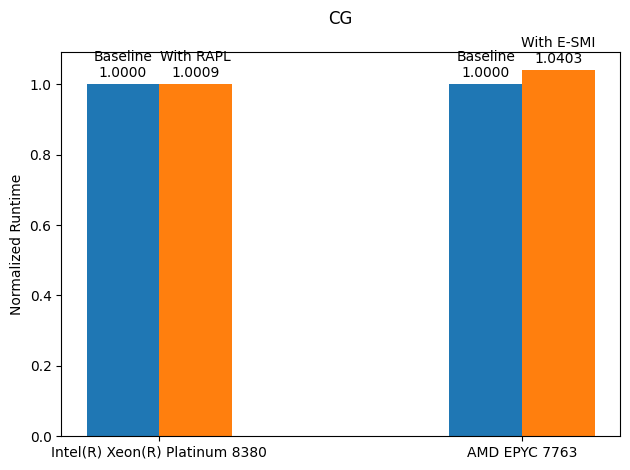

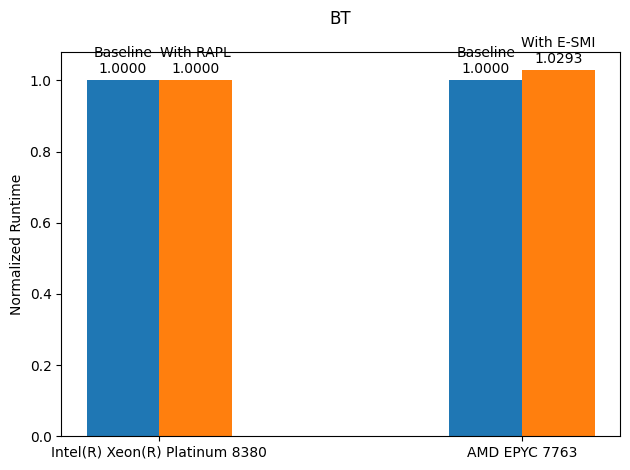

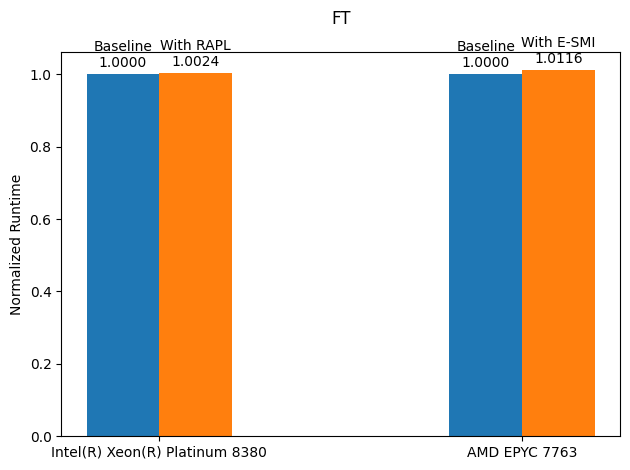

In [25]:
plot([10.6, 10.61],[7.8, 8.114],"CG")
plot([5.7,5.7],[7.52,7.74],"BT")
plot([8.48,8.5],[6.88,6.96],"FT")